In [3857]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
import datetime
import ast
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

from pandas.io.json import json_normalize
import json

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold



from sklearn.svm import LinearSVC




from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.linear_model import SGDRegressor, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV



In [3858]:
df = pd.read_csv("ted_main.csv")

In [3859]:
df.describe(include='all')

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
count,2550.000000,2550,2550.000000,2550,2.550000e+03,2550.000000,2550,2550,2550.000000,2.550000e+03,2550,2550,2544,2550,2550,2550,2.550000e+03
unique,NaN,2550,NaN,355,NaN,NaN,2156,2550,NaN,NaN,2550,2550,1458,2530,2550,2550,NaN
top,NaN,"Organizations are often run according to ""the ...",NaN,TED2014,NaN,NaN,Hans Rosling,"Elora Hardy: Magical houses, made of bamboo",NaN,NaN,"[{'id': 8, 'name': 'Informative', 'count': 223...","[{'id': 509, 'hero': 'https://pe.tedcdn.com/im...",Writer,"['art', 'creativity']",Brain-to-brain communication has arrived. How ...,https://www.ted.com/talks/elizabeth_pisani_sex...,NaN
freq,NaN,1,NaN,84,NaN,NaN,9,1,NaN,NaN,1,1,45,3,1,1,NaN
mean,191.562353,NaN,826.510196,NaN,1.321928e+09,27.326275,NaN,NaN,1.028235,1.343525e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.698297e+06
std,282.315223,NaN,374.009138,NaN,1.197391e+08,9.563452,NaN,NaN,0.207705,9.464009e+07,NaN,NaN,NaN,NaN,NaN,NaN,2.498479e+06
min,2.000000,NaN,135.000000,NaN,7.464960e+07,0.000000,NaN,NaN,1.000000,1.151367e+09,NaN,NaN,NaN,NaN,NaN,NaN,5.044300e+04
25%,63.000000,NaN,577.000000,NaN,1.257466e+09,23.000000,NaN,NaN,1.000000,1.268463e+09,NaN,NaN,NaN,NaN,NaN,NaN,7.557928e+05
50%,118.000000,NaN,848.000000,NaN,1.333238e+09,28.000000,NaN,NaN,1.000000,1.340935e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.124524e+06
75%,221.750000,NaN,1046.750000,NaN,1.412964e+09,33.000000,NaN,NaN,1.000000,1.423432e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.700760e+06


In [3860]:
df.isnull().sum().sort_values(ascending=False)



speaker_occupation    6
views                 0
name                  0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
num_speaker           0
url                   0
published_date        0
ratings               0
related_talks         0
tags                  0
title                 0
comments              0
dtype: int64

In [3861]:
df.speaker_occupation.fillna(value='Writer',inplace=True)
df.isnull().sum().sort_values(ascending=False)

views                 0
name                  0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
num_speaker           0
url                   0
published_date        0
ratings               0
related_talks         0
speaker_occupation    0
tags                  0
title                 0
comments              0
dtype: int64

In [3862]:
df.shape

(2550, 17)

In [3863]:
df.speaker_occupation.value_counts(ascending=False)

Writer                                       51
Designer                                     34
Artist                                       34
Journalist                                   33
Entrepreneur                                 31
Architect                                    30
Inventor                                     27
Psychologist                                 26
Photographer                                 25
Filmmaker                                    21
Educator                                     20
Neuroscientist                               20
Author                                       20
Economist                                    20
Roboticist                                   16
Philosopher                                  16
Biologist                                    15
Physicist                                    14
Marine biologist                             11
Musician                                     11
Global health expert; data visionary    

In [3864]:
df.name.value_counts(ascending=False)

Elora Hardy: Magical houses, made of bamboo                                   1
Daniel Goldstein: The battle between your present and future self             1
Kevin Slavin: How algorithms shape our world                                  1
Stephen Wilkes: The passing of time, caught in a single photo                 1
Mac Barnett: Why a good book is a secret door                                 1
Hans Rosling: Let my dataset change your mindset                              1
Mohamed Ali: The link between unemployment and terrorism                      1
Ariel Garten: Know thyself, with a brain scanner                              1
Tim Jackson: An economic reality check                                        1
Roger McNamee: 6 ways to save the internet                                    1
Sethembile Msezane: Living sculptures that stand for history's truths         1
John Searle: Our shared condition -- consciousness                            1
Garik Israelian: How spectroscopy could 

In [3865]:
df.description.value_counts(ascending=False)

Organizations are often run according to "the superchicken model," where the value is placed on star employees who outperform others. And yet, this isn't what drives the most high-achieving teams. Business leader Margaret Heffernan observes that it is social cohesion — built every coffee break, every time one team member asks another for help — that leads over time to great results. It's a radical rethink of what drives us to do our best work, and what it means to be a leader. Because as Heffernan points out: "Companies don't have ideas. Only people do."    1
Oklahoma City is a midsized town that had a big problem: It was among the most obese towns in America. Mayor Mick Cornett realized that, to make his city a great place to work and live, it had to become healthier too. In this charming talk, he walks us through the interlocking changes that helped OKC drop a collective million pounds (450,000 kilos).                                                                                   

In [3866]:
x=df.duration.value_counts(ascending=False)
print(max(df.duration),min(df.duration))

(5256, 135)


In [3867]:
df.event.value_counts(ascending=False)

TED2014                                 84
TED2009                                 83
TED2016                                 77
TED2013                                 77
TED2015                                 75
TEDGlobal 2012                          70
TED2011                                 70
TED2010                                 68
TEDGlobal 2011                          68
TED2007                                 68
TED2017                                 67
TEDGlobal 2013                          66
TEDGlobal 2009                          65
TED2012                                 65
TED2008                                 57
TEDGlobal 2010                          55
TEDGlobal 2014                          51
TED2006                                 45
TED2005                                 37
TEDIndia 2009                           35
TEDWomen 2010                           34
TED2003                                 34
TEDSummit                               34
TED2004    

In [3868]:
df.languages.value_counts(ascending=False)

26    152
29    144
28    138
27    133
30    130
24    129
23    127
31    127
32    123
22    110
25    108
33    104
20     91
34     91
0      86
21     78
35     74
36     59
37     51
39     47
38     47
19     45
18     32
41     25
17     24
40     24
43     21
44     19
16     19
45     13
     ... 
49      9
4       8
47      8
46      7
11      7
15      7
2       6
12      6
8       6
5       6
3       5
51      5
6       5
7       4
9       3
52      2
54      2
58      2
53      2
57      2
69      1
56      1
60      1
64      1
66      1
65      1
55      1
59      1
61      1
72      1
Name: languages, Length: 66, dtype: int64

In [3869]:
df.main_speaker.value_counts(ascending=False)

Hans Rosling            9
Juan Enriquez           7
Marco Tempest           6
Rives                   6
Bill Gates              5
Dan Ariely              5
Nicholas Negroponte     5
Clay Shirky             5
Jacqueline Novogratz    5
Julian Treasure         5
Chris Anderson          4
Stefan Sagmeister       4
Tom Wujec               4
Lawrence Lessig         4
Ken Robinson            4
Jonathan Drori          4
Al Gore                 4
Kevin Kelly             4
Jonathan Haidt          4
David Pogue             4
Barry Schwartz          4
Robert Full             4
Dan Dennett             4
Stewart Brand           4
Steven Johnson          4
Eve Ensler              4
Dean Kamen              3
Louie Schwartzberg      3
Brian Cox               3
Richard Dawkins         3
                       ..
Anil Seth               1
Jim Toomey              1
Bandi Mbubi             1
Howard Rheingold        1
Loretta Napoleoni       1
Herbie Hancock          1
Arthur Brooks           1
Dan Meyer   

In [3870]:
df.num_speaker.value_counts(ascending=False)

1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

In [3871]:
df.url.value_counts(ascending=False)

https://www.ted.com/talks/elizabeth_pisani_sex_drugs_and_hiv_let_s_get_rational_1\n                               1
https://www.ted.com/talks/sergei_lupashin_a_flying_camera_on_a_leash\n                                            1
https://www.ted.com/talks/rory_sutherland_life_lessons_from_an_ad_man\n                                           1
https://www.ted.com/talks/greg_lynn_on_organic_design\n                                                           1
https://www.ted.com/talks/spencer_wells_is_building_a_family_tree_for_all_humanity\n                              1
https://www.ted.com/talks/daniel_tammet_different_ways_of_knowing\n                                               1
https://www.ted.com/talks/nina_tandon_caring_for_cells\n                                                          1
https://www.ted.com/talks/robin_chase_on_zipcar_and_her_next_big_idea\n                                           1
https://www.ted.com/talks/ronald_sullivan_how_i_help_free_innocent_peopl

In [3872]:
df.published_date.value_counts(ascending=False)

1175731860    20
1151367060     4
1162253460     3
1175559060     3
1153786260     3
1166055060     3
1158624660     2
1154995860     2
1170202260     2
1170979860     2
1176586800     2
1167696660     2
1161735060     2
1163463060     2
1153181460     2
1154391060     2
1240362000     2
1159229460     2
1168992660     2
1161130260     2
1241658000     2
1168301460     2
1152490260     2
1159747860     2
1160439060     2
1151440680     2
1171843860     2
1162944660     2
1155600660     2
1158019860     2
              ..
1499871419     1
1455814177     1
1323193144     1
1373900562     1
1192954500     1
1238029200     1
1436803735     1
1216625280     1
1500390013     1
1494342268     1
1386691218     1
1165363860     1
1374591660     1
1333465749     1
1354810027     1
1393863338     1
1409929897     1
1415981736     1
1231400340     1
1334590118     1
1439478433     1
1301404320     1
1328718495     1
1442588592     1
1255077600     1
1299774060     1
1316444824     1
1361203863    

In [3873]:
df.ratings.value_counts(ascending=False)

[{'id': 8, 'name': 'Informative', 'count': 223}, {'id': 10, 'name': 'Inspiring', 'count': 101}, {'id': 24, 'name': 'Persuasive', 'count': 68}, {'id': 25, 'name': 'OK', 'count': 112}, {'id': 11, 'name': 'Longwinded', 'count': 25}, {'id': 26, 'name': 'Obnoxious', 'count': 86}, {'id': 22, 'name': 'Fascinating', 'count': 99}, {'id': 3, 'name': 'Courageous', 'count': 11}, {'id': 21, 'name': 'Unconvincing', 'count': 131}, {'id': 7, 'name': 'Funny', 'count': 22}, {'id': 2, 'name': 'Confusing', 'count': 20}, {'id': 9, 'name': 'Ingenious', 'count': 36}, {'id': 1, 'name': 'Beautiful', 'count': 23}, {'id': 23, 'name': 'Jaw-dropping', 'count': 11}]                        1
[{'id': 7, 'name': 'Funny', 'count': 1132}, {'id': 9, 'name': 'Ingenious', 'count': 306}, {'id': 10, 'name': 'Inspiring', 'count': 216}, {'id': 22, 'name': 'Fascinating', 'count': 216}, {'id': 2, 'name': 'Confusing', 'count': 77}, {'id': 25, 'name': 'OK', 'count': 145}, {'id': 1, 'name': 'Beautiful', 'count': 95}, {'id': 11, 'na

In [3874]:
df.related_talks.value_counts(ascending=False)

[{'id': 509, 'hero': 'https://pe.tedcdn.com/images/ted/a35c1da2e6a59c48333f8d5a6957f721f7f7ed3a_2880x1620.jpg', 'speaker': 'Bonnie Bassler', 'title': 'How bacteria "talk"', 'duration': 1094, 'slug': 'bonnie_bassler_on_how_bacteria_communicate', 'viewed_count': 2192853}, {'id': 18, 'hero': 'https://pe.tedcdn.com/images/ted/12_480x360.jpg', 'speaker': 'Janine Benyus', 'title': "Biomimicry's surprising lessons from nature's engineers", 'duration': 1399, 'slug': 'janine_benyus_shares_nature_s_designs', 'viewed_count': 1920457}, {'id': 2127, 'hero': 'https://pe.tedcdn.com/images/ted/d5392a4becfeddb12318d16f9b3e66eea70449c1_2880x1620.jpg', 'speaker': 'Ameenah Gurib-Fakim', 'title': 'Humble plants that hide surprising secrets', 'duration': 852, 'slug': 'ameenah_gurib_fakim_humble_plants_that_hide_surprising_secrets', 'viewed_count': 952369}, {'id': 556, 'hero': 'https://pe.tedcdn.com/images/ted/92661_800x600.jpg', 'speaker': 'Jonathan Drori', 'title': "Why we're storing billions of seeds", 'd

In [3875]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


In [3876]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [3877]:
df.columns

Index([u'comments', u'description', u'duration', u'event', u'film_date',
       u'languages', u'main_speaker', u'name', u'num_speaker',
       u'published_date', u'ratings', u'related_talks', u'speaker_occupation',
       u'tags', u'title', u'url', u'views'],
      dtype='object')

In [3878]:
len(df)

2550

In [3879]:
df.corr()

,comments,duration,film_date,languages,num_speaker,published_date,views
comments,1.000000,0.140694,-0.133303,0.318284,-0.035489,-0.185936,0.530939
duration,0.140694,1.000000,-0.242941,-0.295681,0.022257,-0.166324,0.048740
film_date,-0.133303,-0.242941,1.000000,-0.061957,0.040227,0.902565,0.006447
languages,0.318284,-0.295681,-0.061957,1.000000,-0.063100,-0.171836,0.377623
num_speaker,-0.035489,0.022257,0.040227,-0.063100,1.000000,0.049240,-0.026389
published_date,-0.185936,-0.166324,0.902565,-0.171836,0.049240,1.000000,-0.017920
views,0.530939,0.048740,0.006447,0.377623,-0.026389,-0.017920,1.000000


In [3880]:
df1 = df.drop('url',axis=1).drop('description',axis=1).drop('event',axis=1)

In [3881]:
df1.head()

,comments,duration,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,views
0,4553,1164,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110
1,265,977,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520
2,124,1286,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292
3,200,1116,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550
4,593,1190,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869


In [3882]:
df1['published_date'] = df1['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [3883]:
df1= df1.drop('film_date',axis =1)

In [3884]:
df1.num_speaker.value_counts()


1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

In [3885]:
df1.corr()

,comments,duration,languages,num_speaker,views
comments,1.000000,0.140694,0.318284,-0.035489,0.530939
duration,0.140694,1.000000,-0.295681,0.022257,0.048740
languages,0.318284,-0.295681,1.000000,-0.063100,0.377623
num_speaker,-0.035489,0.022257,-0.063100,1.000000,-0.026389
views,0.530939,0.048740,0.377623,-0.026389,1.000000


In [3886]:
df1=df1.drop('num_speaker',axis = 1).drop('related_talks',axis=1)

In [3887]:
df1.head()

,comments,duration,languages,main_speaker,name,published_date,ratings,speaker_occupation,tags,title,views
0,4553,1164,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110
1,265,977,43,Al Gore,Al Gore: Averting the climate crisis,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520
2,124,1286,26,David Pogue,David Pogue: Simplicity sells,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292
3,200,1116,35,Majora Carter,Majora Carter: Greening the ghetto,27-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550
4,593,1190,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,28-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869


In [3888]:
df2=df1.main_speaker.value_counts()
#print(df1.name.iloc[3])
df2

Hans Rosling            9
Juan Enriquez           7
Marco Tempest           6
Rives                   6
Bill Gates              5
Dan Ariely              5
Nicholas Negroponte     5
Clay Shirky             5
Jacqueline Novogratz    5
Julian Treasure         5
Chris Anderson          4
Stefan Sagmeister       4
Tom Wujec               4
Lawrence Lessig         4
Ken Robinson            4
Jonathan Drori          4
Al Gore                 4
Kevin Kelly             4
Jonathan Haidt          4
David Pogue             4
Barry Schwartz          4
Robert Full             4
Dan Dennett             4
Stewart Brand           4
Steven Johnson          4
Eve Ensler              4
Dean Kamen              3
Louie Schwartzberg      3
Brian Cox               3
Richard Dawkins         3
                       ..
Anil Seth               1
Jim Toomey              1
Bandi Mbubi             1
Howard Rheingold        1
Loretta Napoleoni       1
Herbie Hancock          1
Arthur Brooks           1
Dan Meyer   

In [3889]:
df3 = df1['main_speaker'].value_counts().reset_index(name='speak_count').rename(columns={'index': 'main_speaker'})

In [3890]:
df4=(pd.merge(df1,df3,on=['main_speaker'], how='left'))


In [3891]:
df4 = df4.drop('main_speaker',axis=1)

In [3892]:
df4 = df4.drop('name',axis=1)
#name = main speaker 
#main speaker ====count

In [3893]:
df4.head(100)

,comments,duration,languages,published_date,ratings,speaker_occupation,tags,title,views,speak_count
0,4553,1164,60,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,4
1,265,977,43,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520,4
2,124,1286,26,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292,4
3,200,1116,35,27-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550,2
4,593,1190,48,28-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869,9
5,672,1305,36,28-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,20685401,1
6,919,992,31,10-07-2006,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,3769987,2
7,46,1198,19,10-07-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,967741,2
8,852,1485,32,18-07-2006,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,2567958,4
9,900,1262,31,18-07-2006,"[{'id': 21, 'name': 'Unconvincing', 'count': 8...","Pastor, author","['Christianity', 'God', 'culture', 'happiness'...",A life of purpose,3095993,1


# DATE MANIPULATIONS


In [3894]:
df4['month'] = df4['published_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

In [3895]:
df5 = df4['month'].value_counts().reset_index(name='m_count').rename(columns={'index': 'month'})
df6=(pd.merge(df4,df5,on=['month'], how='left'))

In [3896]:
df6=df6.drop('month',axis=1)

In [3897]:
def getday(x):
    day, month, year = (int(i) for i in x.split('-'))    
    answer = datetime.date(year, month, day).weekday()
    return day_order[answer]

In [3898]:
df6['day'] = df6['published_date'].apply(getday)

In [3899]:
df7 = df6['day'].value_counts().reset_index(name='d_day').rename(columns={'index': 'day'})
df6=(pd.merge(df6,df7,on=['day'], how='left'))

In [3900]:
df6['year'] = df6['published_date'].apply(lambda x: x.split('-')[2])
df6
df6.drop('day',axis=1).drop('published_date',axis=1).drop('title',axis=1)




,comments,duration,languages,ratings,speaker_occupation,tags,views,speak_count,m_count,d_day,year
0,4553,1164,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",47227110,4,228,531,2006
1,265,977,43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Climate advocate,"['alternative energy', 'cars', 'climate change...",3200520,4,228,531,2006
2,124,1286,26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",1636292,4,228,531,2006
3,200,1116,35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",1697550,2,228,531,2006
4,593,1190,48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",12005869,9,228,495,2006
5,672,1305,36,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",20685401,1,228,495,2006
6,919,992,31,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",3769987,2,204,364,2006
7,46,1198,19,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...",Architect,"['architecture', 'collaboration', 'culture', '...",967741,2,204,364,2006
8,852,1485,32,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",2567958,4,204,531,2006
9,900,1262,31,"[{'id': 21, 'name': 'Unconvincing', 'count': 8...","Pastor, author","['Christianity', 'God', 'culture', 'happiness'...",3095993,1,204,531,2006


In [3901]:
df8 = df6['year'].value_counts().reset_index(name='y_count').rename(columns={'index': 'year'})
df6=(pd.merge(df6,df8,on=['year'], how='left'))


In [3902]:
df6.corr()

,comments,duration,languages,views,speak_count,m_count,d_day,y_count
comments,1.000000,0.140694,0.318284,0.530939,0.100333,0.031677,-0.041702,0.038069
duration,0.140694,1.000000,-0.295681,0.048740,0.027162,0.025367,0.009553,-0.148452
languages,0.318284,-0.295681,1.000000,0.377623,0.161638,0.019510,0.124724,0.096566
views,0.530939,0.048740,0.377623,1.000000,0.095676,0.024340,0.017765,-0.048918
speak_count,0.100333,0.027162,0.161638,0.095676,1.000000,0.038031,0.052503,-0.131039
m_count,0.031677,0.025367,0.019510,0.024340,0.038031,1.000000,0.035797,-0.005146
d_day,-0.041702,0.009553,0.124724,0.017765,0.052503,0.035797,1.000000,-0.171425
y_count,0.038069,-0.148452,0.096566,-0.048918,-0.131039,-0.005146,-0.171425,1.000000


In [3903]:
df6.dtypes

comments               int64
duration               int64
languages              int64
published_date        object
ratings               object
speaker_occupation    object
tags                  object
title                 object
views                  int64
speak_count            int64
m_count                int64
day                   object
d_day                  int64
year                  object
y_count                int64
dtype: object

In [3904]:
df6['type']="non-tech"
df7 = df6
df7['type'].fillna("",inplace=True)
a=["tech","research","computer","science","Computer scientist", "Researcher", "inventor", "Engineer", "Inventor", "Researcher", "futurist", "Data", "Science", "Biologist", "biologist", "Technologist", "Neuroscientist", "psychologist", "Neuroscientist", "Ecologist", "health", "psychologist", "Health"]
df7.loc[df7.speaker_occupation.str.contains("|".join(a)),'type']="tech"

In [3905]:
df7 = df7.drop('speaker_occupation',axis = 1)

In [3906]:
df7=df7.drop('title',axis =1 )

In [3907]:
df7['type']= np.where(df7['type']=='non-tech',0,1)

In [3908]:

df7.corr()

,comments,duration,languages,views,speak_count,m_count,d_day,y_count,type
comments,1.000000,0.140694,0.318284,0.530939,0.100333,0.031677,-0.041702,0.038069,0.019705
duration,0.140694,1.000000,-0.295681,0.048740,0.027162,0.025367,0.009553,-0.148452,-0.028982
languages,0.318284,-0.295681,1.000000,0.377623,0.161638,0.019510,0.124724,0.096566,0.011859
views,0.530939,0.048740,0.377623,1.000000,0.095676,0.024340,0.017765,-0.048918,0.009466
speak_count,0.100333,0.027162,0.161638,0.095676,1.000000,0.038031,0.052503,-0.131039,0.036992
m_count,0.031677,0.025367,0.019510,0.024340,0.038031,1.000000,0.035797,-0.005146,0.017879
d_day,-0.041702,0.009553,0.124724,0.017765,0.052503,0.035797,1.000000,-0.171425,0.042572
y_count,0.038069,-0.148452,0.096566,-0.048918,-0.131039,-0.005146,-0.171425,1.000000,0.020816
type,0.019705,-0.028982,0.011859,0.009466,0.036992,0.017879,0.042572,0.020816,1.000000


# SENTIMENTAL ANALYSIS


In [3909]:

tdf = pd.read_csv('transcripts.csv')

In [3910]:
tdf.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [3911]:
#TED users can give ratings to each talk. There are 14 possible ratings and they will be categorized as positive, negative and neutral:

#Positive: 'Beautiful', 'Courageous', 'Fascinating', 'Funny', 'Informative', 'Ingenious', 'Inspiring', 'Jaw-dropping', 'Persuasive'
#Negative: 'Confusing', 'Longwinded', 'Obnoxious', 'Unconvincing'
#Neutral: 'OK'

In [3912]:
df7=df7.drop('type',axis = 1).drop('day',axis=1).drop('published_date',axis=1)
df7.dtypes

comments        int64
duration        int64
languages       int64
ratings        object
tags           object
views           int64
speak_count     int64
m_count         int64
d_day           int64
year           object
y_count         int64
dtype: object

In [3913]:
df7['ratings']=df7['ratings'].str.replace("'",'"')

pd.read_json(df7['ratings'].iloc[1])[['name','count']]



,name,count
0,Funny,544
1,Courageous,139
2,Confusing,62
3,Beautiful,58
4,Unconvincing,258
5,Longwinded,113
6,Informative,443
7,Inspiring,413
8,Fascinating,132
9,Ingenious,56


In [3914]:

df7=df7.merge(df7.ratings.apply(lambda x: pd.Series(pd.read_json(x)['count'].values,index=pd.read_json(x)['name'])),left_index=True,right_index=True)




In [3915]:
df7.columns

Index([    u'comments',     u'duration',    u'languages',      u'ratings',
               u'tags',        u'views',  u'speak_count',      u'm_count',
              u'd_day',         u'year',      u'y_count',        u'Funny',
          u'Beautiful',    u'Ingenious',   u'Courageous',   u'Longwinded',
          u'Confusing',  u'Informative',  u'Fascinating', u'Unconvincing',
         u'Persuasive', u'Jaw-dropping',           u'OK',    u'Obnoxious',
          u'Inspiring'],
      dtype='object')

In [3916]:
Positive = ['Beautiful', 'Courageous', 'Fascinating', 'Funny', 'Informative', 'Ingenious', 'Inspiring', 'Jaw-dropping', 'Persuasive']
Negative = ['Confusing', 'Longwinded', 'Obnoxious', 'Unconvincing']

In [3917]:
df7['positive']=df7.loc[:,Positive].sum(axis=1)+1
df7['negative']=df7.loc[:,Negative].sum(axis=1)+1
df7['pop_ratio']=df7['positive']/df7['negative']
df7.loc[:,'Popular'] = df7['pop_ratio'].apply (lambda x: 1 if x >5 else 0)
#if pop ratio >5 popular


print ("No. of Not Popular talks: ", len(df7[df7['Popular']==0]))

('No. of Not Popular talks: ', 328)


In [3918]:
df7.corr()

,comments,duration,languages,views,speak_count,m_count,d_day,y_count,Funny,Beautiful,...,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,positive,negative,pop_ratio,Popular
comments,1.000000,0.140694,0.318284,0.530939,0.100333,0.031677,-0.041702,0.038069,0.360272,0.393634,...,0.448938,0.635895,0.331143,0.472196,0.408906,0.559175,0.632114,0.502608,-0.005257,0.019170
duration,0.140694,1.000000,-0.295681,0.048740,0.027162,0.025367,0.009553,-0.148452,0.006360,0.030392,...,0.032350,0.131193,0.039251,-0.078563,0.059419,0.090312,0.098051,0.114355,-0.027729,-0.028965
languages,0.318284,-0.295681,1.000000,0.377623,0.161638,0.019510,0.124724,0.096566,0.221126,0.229682,...,0.202483,0.290461,0.160544,0.432593,0.131923,0.277866,0.330415,0.202368,0.019652,0.105236
views,0.530939,0.048740,0.377623,1.000000,0.095676,0.024340,0.017765,-0.048918,0.594588,0.554991,...,0.279688,0.725674,0.441740,0.701249,0.252338,0.775339,0.861209,0.379358,0.103759,0.120745
speak_count,0.100333,0.027162,0.161638,0.095676,1.000000,0.038031,0.052503,-0.131039,0.125484,0.040212,...,0.050751,0.150900,0.104721,0.134139,0.047917,0.055791,0.122263,0.072324,-0.010560,0.030651
m_count,0.031677,0.025367,0.019510,0.024340,0.038031,1.000000,0.035797,-0.005146,0.009106,0.010017,...,0.017246,0.019137,0.010558,0.031605,0.030327,0.014102,0.024535,0.033823,-0.013718,-0.027435
d_day,-0.041702,0.009553,0.124724,0.017765,0.052503,0.035797,1.000000,-0.171425,-0.015967,-0.015064,...,-0.019307,-0.013137,-0.037836,0.007662,-0.045306,-0.016839,-0.017207,-0.023961,0.018008,0.008821
y_count,0.038069,-0.148452,0.096566,-0.048918,-0.131039,-0.005146,-0.171425,1.000000,-0.084949,-0.029591,...,-0.038308,-0.048442,-0.120921,-0.045534,-0.060109,-0.006544,-0.059491,-0.103487,0.001327,0.036747
Funny,0.360272,0.006360,0.221126,0.594588,0.125484,0.009106,-0.015967,-0.084949,1.000000,0.297671,...,0.133799,0.504355,0.213708,0.433661,0.205994,0.483643,0.605091,0.233245,0.075366,0.042565
Beautiful,0.393634,0.030392,0.229682,0.554991,0.040212,0.010017,-0.015064,-0.029591,0.297671,1.000000,...,0.130402,0.385340,0.426962,0.365444,0.157576,0.705615,0.718671,0.218050,0.159643,0.110250


In [3919]:
df9 = df6

In [3920]:
df9=df9.drop('day',axis=1).drop('ratings',axis=1).drop('year',axis=1).drop('speaker_occupation',axis=1).drop('title',axis=1).drop('published_date',axis=1)



In [3921]:
df9['positive']=df7['positive']
df9['negative']=df7['negative']
df9['pop_ratio']=df7['pop_ratio']
df9['Popularity']=df7['Popular']

In [3922]:
df9.corr()

,comments,duration,languages,views,speak_count,m_count,d_day,y_count,positive,negative,pop_ratio,Popularity
comments,1.000000,0.140694,0.318284,0.530939,0.100333,0.031677,-0.041702,0.038069,0.632114,0.502608,-0.005257,0.019170
duration,0.140694,1.000000,-0.295681,0.048740,0.027162,0.025367,0.009553,-0.148452,0.098051,0.114355,-0.027729,-0.028965
languages,0.318284,-0.295681,1.000000,0.377623,0.161638,0.019510,0.124724,0.096566,0.330415,0.202368,0.019652,0.105236
views,0.530939,0.048740,0.377623,1.000000,0.095676,0.024340,0.017765,-0.048918,0.861209,0.379358,0.103759,0.120745
speak_count,0.100333,0.027162,0.161638,0.095676,1.000000,0.038031,0.052503,-0.131039,0.122263,0.072324,-0.010560,0.030651
m_count,0.031677,0.025367,0.019510,0.024340,0.038031,1.000000,0.035797,-0.005146,0.024535,0.033823,-0.013718,-0.027435
d_day,-0.041702,0.009553,0.124724,0.017765,0.052503,0.035797,1.000000,-0.171425,-0.017207,-0.023961,0.018008,0.008821
y_count,0.038069,-0.148452,0.096566,-0.048918,-0.131039,-0.005146,-0.171425,1.000000,-0.059491,-0.103487,0.001327,0.036747
positive,0.632114,0.098051,0.330415,0.861209,0.122263,0.024535,-0.017207,-0.059491,1.000000,0.381766,0.150918,0.129063
negative,0.502608,0.114355,0.202368,0.379358,0.072324,0.033823,-0.023961,-0.103487,0.381766,1.000000,-0.200562,-0.363333


In [3923]:
df9=df9.drop('type',axis=1).drop('tags',axis = 1)
df10 = df9

In [3924]:
df10.head()

,comments,duration,languages,views,speak_count,m_count,d_day,y_count,positive,negative,pop_ratio,Popularity
0,4553,1164,60,47227110,4,228,531,50,91539,1139,80.367867,1
1,265,977,43,3200520,4,228,531,50,2170,565,3.840708,0
2,124,1286,26,1636292,4,228,531,50,2328,352,6.613636,1
3,200,1116,35,1697550,2,228,531,50,3488,157,22.216561,1
4,593,1190,48,12005869,9,228,495,50,25063,311,80.588424,1


In [3925]:
df10 = df10.drop('views',axis=1)
df10.head()

,comments,duration,languages,speak_count,m_count,d_day,y_count,positive,negative,pop_ratio,Popularity
0,4553,1164,60,4,228,531,50,91539,1139,80.367867,1
1,265,977,43,4,228,531,50,2170,565,3.840708,0
2,124,1286,26,4,228,531,50,2328,352,6.613636,1
3,200,1116,35,2,228,531,50,3488,157,22.216561,1
4,593,1190,48,9,228,495,50,25063,311,80.588424,1


In [3926]:
df10['views']=df9['views']

In [3927]:
df10.head()

,comments,duration,languages,speak_count,m_count,d_day,y_count,positive,negative,pop_ratio,Popularity,views
0,4553,1164,60,4,228,531,50,91539,1139,80.367867,1,47227110
1,265,977,43,4,228,531,50,2170,565,3.840708,0,3200520
2,124,1286,26,4,228,531,50,2328,352,6.613636,1,1636292
3,200,1116,35,2,228,531,50,3488,157,22.216561,1,1697550
4,593,1190,48,9,228,495,50,25063,311,80.588424,1,12005869


In [3928]:
ind_var = df10.drop('views',axis =1 )
x = ind_var.values
y = df10['views'].values

In [3929]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [3930]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [3931]:
y_pred = lr.predict(X_test)
print('R^2 = ',lr.score(X_test,y_test))


('R^2 = ', 0.8243487284446044)


In [3932]:
df10.head()

/anaconda2/lib/python2.7/site-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,comments,duration,languages,speak_count,m_count,d_day,y_count,positive,negative,pop_ratio,Popularity,views
0,4553,1164,60,4,228,531,50,91539,1139,80.367867,1,47227110
1,265,977,43,4,228,531,50,2170,565,3.840708,0,3200520
2,124,1286,26,4,228,531,50,2328,352,6.613636,1,1636292
3,200,1116,35,2,228,531,50,3488,157,22.216561,1,1697550
4,593,1190,48,9,228,495,50,25063,311,80.588424,1,12005869


In [3933]:
#tags
#speaker occupation 
#title
##url related talks


In [3934]:
#rt 
#tags
#speaker_occ

In [3935]:
df10.head()

,comments,duration,languages,speak_count,m_count,d_day,y_count,positive,negative,pop_ratio,Popularity,views
0,4553,1164,60,4,228,531,50,91539,1139,80.367867,1,47227110
1,265,977,43,4,228,531,50,2170,565,3.840708,0,3200520
2,124,1286,26,4,228,531,50,2328,352,6.613636,1,1636292
3,200,1116,35,2,228,531,50,3488,157,22.216561,1,1697550
4,593,1190,48,9,228,495,50,25063,311,80.588424,1,12005869


In [3936]:
df_1 = pd.read_csv('cleaned_data_.csv')

In [3937]:
df_1=df_1.drop('published_date',axis=1).drop('speaker_occupation',axis=1).drop('title',axis=1).drop('Positive',axis=1).drop('Negative',axis=1).drop('views',axis=1)





In [3938]:
df_1=df_1.drop('Moderate',axis=1).drop('related_views',axis=1).drop('comments',axis=1).drop('duration',axis=1).drop('languages',axis=1)


In [3939]:
df_1.shape

(2550, 17)

In [3940]:
df_f = pd.concat([df10,df_1],axis=1)

In [3941]:
df_f.columns

Index([u'comments', u'duration', u'languages', u'speak_count', u'm_count',
       u'd_day', u'y_count', u'positive', u'negative', u'pop_ratio',
       u'Popularity', u'views', u'Unnamed: 0', u'event_class',
       u'exploration_tag', u'Epidemics_tag', u'Scientific Fields_tag',
       u'media/entertainment_tag', u'robots/prosthetics_tag',
       u'Vices/Prejudices_tag', u'Outer-Space_tag', u'Humanity/Progress_tag',
       u'arts/creativity_tag', u'animals/organisms_tag', u'music_tag',
       u'Organizing/Perceiving Information_tag', u'Middle East_tag',
       u'Global issues_tag', u'philanthropy/religion_tag'],
      dtype='object')

In [3942]:
df_f = df_f.drop('Unnamed: 0',axis=1)

In [3943]:
df_f.columns

Index([u'comments', u'duration', u'languages', u'speak_count', u'm_count',
       u'd_day', u'y_count', u'positive', u'negative', u'pop_ratio',
       u'Popularity', u'views', u'event_class', u'exploration_tag',
       u'Epidemics_tag', u'Scientific Fields_tag', u'media/entertainment_tag',
       u'robots/prosthetics_tag', u'Vices/Prejudices_tag', u'Outer-Space_tag',
       u'Humanity/Progress_tag', u'arts/creativity_tag',
       u'animals/organisms_tag', u'music_tag',
       u'Organizing/Perceiving Information_tag', u'Middle East_tag',
       u'Global issues_tag', u'philanthropy/religion_tag'],
      dtype='object')

In [3944]:
df_f.dtypes

comments                                   int64
duration                                   int64
languages                                  int64
speak_count                                int64
m_count                                    int64
d_day                                      int64
y_count                                    int64
positive                                   int64
negative                                   int64
pop_ratio                                float64
Popularity                                 int64
views                                      int64
event_class                               object
exploration_tag                            int64
Epidemics_tag                              int64
Scientific Fields_tag                      int64
media/entertainment_tag                    int64
robots/prosthetics_tag                     int64
Vices/Prejudices_tag                       int64
Outer-Space_tag                            int64
Humanity/Progress_ta

In [3945]:
df_f['event_class']= np.where(df_f['event_class']=='Yearly TED Conference',10,np.where(df_f['event_class']=='TEDx',5,np.where(df_f['event_class']=='TEDGlobal',5,np.where(df_f['event_class']=='Other',5,0))))
                                                                                       
                                                                                       
                                                                                       
                                                                                       
                                                                                       
                                                                                       

# DATA PREPROCESSING


In [3946]:
from sklearn import preprocessing
from sklearn import model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
px = df_f.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(px)
df_f1=pd.DataFrame(x_scaled, columns=df_f.columns)

In [3947]:

ind_f1 = df_f1.drop('views',axis=1)


In [3948]:
x11 = ind_f1.values
y11 = df_f1['views'].values

In [3949]:
X_train, X_test, y_train, y_test = train_test_split(x11, y11, test_size=0.2)
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [3950]:
y_pred = lr.predict(X_test)
print('R^2 = ',lr.score(X_test,y_test))


('R^2 = ', 0.6633881508386428)


In [3951]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))

In [3952]:
rms

0.022899888440054347

# XGBRegressor


In [3953]:
ind_f2 = df_f1.drop('views',axis=1)
x22 = ind_f2.values
y22 = df_f1['views'].values

In [3954]:
import xgboost as xgb


In [3955]:
df_dmatrix = xgb.DMatrix(data=x22,label=y22)

In [3956]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',colsample_bytree = 1,learning_rate = 0.1,gamma=0,max_depth = 5,n_estimators = 100)
reg_cv = GridSearchCV(xg_reg, {"colsample_bytree":[0.7,0.9,0.8,1.0],"min_child_weight":[1.0,1.2],'max_depth': [3,4,5,6,7,8], 'n_estimators': [20,50,10,1000,100]}, verbose=1)






In [3957]:
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)

In [3958]:
preds = xg_reg.predict(X_test)

In [3959]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.022839


In [3960]:
xg_reg.score(X_test,y_test)

0.6651865565632659

In [3961]:
xg_reg.score(X_train,y_train)

0.9725237620254465

In [3962]:
preds2 = xg_reg.predict(X_train)

In [3963]:
rmse = np.sqrt(mean_squared_error(y_train, preds2))
print("RMSE: %f" % (rmse))

RMSE: 0.009249


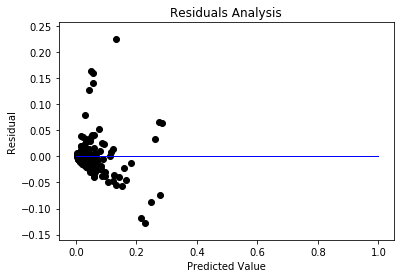

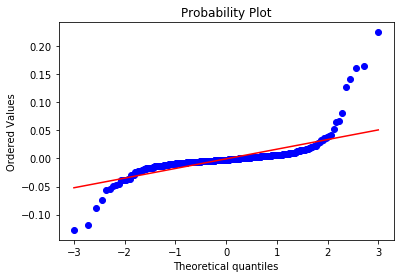

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     298.9
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        05:06:46   Log-Likelihood:                 5704.5
No. Observations:                2550   AIC:                        -1.135e+04
Df Residuals:                    2522   BIC:                        -1.119e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0133      0.005     -2.817      0.0

In [3994]:

# residual plot
residuals = y_test - preds
plt.figure(0)
plt.title('Residuals Analysis')
plt.scatter(preds, residuals,  color='black')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.plot([0, 1], [0, 0], color='blue', linestyle='-', linewidth=1)

plt.figure(1)
stats.probplot(residuals, dist="norm", plot=plt)

plt.show()



x99= sm.add_constant(x22)
ols=sm.OLS(y22,x99)
est = ols.fit()
print(est.summary())

In [3965]:
from sklearn import feature_selection
print(feature_selection.f_regression(x22, y22, center=True))
print()

estimator = LinearRegression(fit_intercept = True)
selector = feature_selection.RFE(estimator, 2, step=1)
selector = selector.fit(x22, y22)

#  Selected (i.e., estimated best) features are assigned rank 1.
print(selector.ranking_)

(array([1.00023209e+03, 6.06751795e+00, 4.23772256e+02, 2.35397675e+01,
       1.51046225e+00, 8.04417002e-01, 6.11203298e+00, 7.31573857e+03,
       4.28332250e+02, 2.77301523e+01, 3.76976304e+01, 9.45947341e+00,
       1.41472845e+00, 7.45509066e-01, 9.75663765e+00, 3.50215689e+00,
       1.52632884e+01, 8.46125150e+00, 2.04562079e+01, 9.94836801e-01,
       8.78427967e+00, 1.03418988e-01, 8.25711897e-02, 5.64167913e+00,
       1.30503262e+00, 6.67678618e+00, 2.61387209e-01]), array([1.80332209e-185, 1.38346898e-002, 3.14057751e-087, 1.29737785e-006,
       2.19182053e-001, 3.69860762e-001, 1.34913157e-002, 0.00000000e+000,
       4.43292044e-088, 1.51124382e-007, 9.55265851e-010, 2.12291283e-003,
       2.34383851e-001, 3.87983088e-001, 1.80684311e-003, 6.14034623e-002,
       9.59500314e-005, 3.65932377e-003, 6.38046915e-006, 3.18657794e-001,
       3.06653496e-003, 7.47791041e-001, 7.73866153e-001, 1.76120048e-002,
       2.53403334e-001, 9.82284043e-003, 6.09213020e-001]))
()
[ 2

In [3966]:
# 1st,8th,3rd,9th,11th,10th,4th,17th,15th,12th,18th,21st,26th,7th,16th
# 8th,9th,1ST,3rd,10th,4th,11th,6th,26th,18th,17th,21st,
#1st,2nd,3rd,4th,8th,9th,10th,11th,12th,15th,17th,18th,21st,26th

In [3967]:
df_f3 = df_f1.drop('m_count',axis=1).drop('d_day',axis=1).drop('y_count',axis=1).drop('event_class',axis=1).drop('exploration_tag',axis=1).drop('Scientific Fields_tag',axis=1).drop('Vices/Prejudices_tag',axis=1).drop('Outer-Space_tag',axis=1).drop('arts/creativity_tag',axis=1).drop('animals/organisms_tag',axis=1).drop('music_tag',axis=1).drop('Organizing/Perceiving Information_tag',axis=1).drop('Middle East_tag',axis=1)

#df_f3 = df_f3.drop('languages',axis=1).drop('pop_ratio',axis=1).drop('negative',axis=1).drop('Epidemics_tag',axis=1).drop('media/entertainment_tag',axis=1).drop('robots/prosthetics_tag',axis=1).drop('Humanity/Progress_tag',axis=1)


In [3968]:
df_f3.head()

,comments,duration,languages,speak_count,positive,negative,pop_ratio,Popularity,views,Epidemics_tag,media/entertainment_tag,robots/prosthetics_tag,Humanity/Progress_tag,Global issues_tag,philanthropy/religion_tag
0,0.710872,0.200937,0.833333,0.375,1.000000,0.301297,0.082538,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0
1,0.041081,0.164421,0.597222,0.375,0.023215,0.149325,0.003706,0.0,0.066772,0.0,1.0,1.0,0.0,0.0,0.0
2,0.019057,0.224761,0.361111,0.375,0.024942,0.092931,0.006562,1.0,0.033615,1.0,0.0,0.0,0.0,0.0,0.0
3,0.030928,0.191564,0.486111,0.125,0.037620,0.041303,0.022635,1.0,0.034914,0.0,0.0,1.0,1.0,0.0,0.0
4,0.092315,0.206014,0.666667,1.000,0.273431,0.082076,0.082765,1.0,0.253418,1.0,0.0,0.0,0.0,0.0,0.0


In [3969]:
ind_f3 = df_f3.drop('views',axis=1)
x33 = ind_f3.values
y33 = df_f3['views'].values

In [3970]:
df_dmatrix = xgb.DMatrix(data=x33,label=y33)

In [3971]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',colsample_bytree = 1,learning_rate = 0.1,gamma=0,max_depth = 3,n_estimators = 50)







In [3972]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x33, y33, test_size=0.33)

In [3973]:
xg_reg.fit(X1_train,y1_train)

XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=50, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)

In [3974]:
preds4 = xg_reg.predict(X1_test)

In [3975]:
rmse = np.sqrt(mean_squared_error(y1_test, preds4))
print("RMSE: %f" % (rmse))

RMSE: 0.031123


In [3976]:
xg_reg.score(X1_test,y1_test)

0.7279412202385249

In [3977]:
xg_reg.score(X1_train,y1_train)

0.8455444498709705

In [3978]:
preds3 = xg_reg.predict(X1_train)

In [3979]:
rmse = np.sqrt(mean_squared_error(y1_train, preds3))
print("RMSE: %f" % (rmse))

RMSE: 0.019369


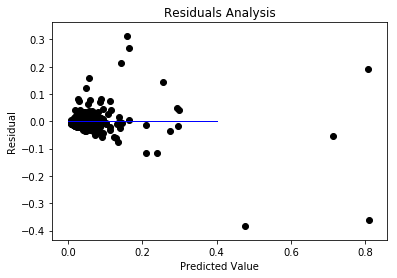

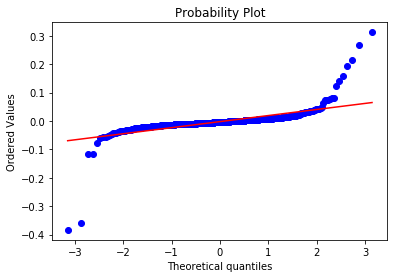

In [3980]:
# residual plot
residuals = y1_test - preds4
plt.figure(0)
plt.title('Residuals Analysis')
plt.scatter(preds4, residuals,  color='black')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.plot([0, 0.4], [0, 0], color='blue', linestyle='-', linewidth=1)

plt.figure(1)
stats.probplot(residuals, dist="norm", plot=plt)

plt.show()


In [3981]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [3982]:
y_pred = lr.predict(X1_test)
print('R^2 = ',lr.score(X1_test,y1_test))

('R^2 = ', 0.7815645076088996)


In [3983]:
rms = sqrt(mean_squared_error(y1_test, y_pred))

In [3984]:
rms

0.027887219057435398

In [3985]:
print('coeff= ',lr.coef_)

('coeff= ', array([-7.85642783e-02, -7.07978490e-03,  3.51465817e-02, -9.60308114e-03,
        1.06968268e+00,  1.02691325e-01, -3.38653869e-02,  6.49215562e-03,
        4.12393850e-04,  1.07866315e-03, -1.51579986e-03, -9.86718782e-04,
       -3.14343470e-03, -6.74421762e-02]))


In [3993]:
x99= sm.add_constant(x33)
ols=sm.OLS(y33,x99)
est = ols.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     571.6
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        05:06:23   Log-Likelihood:                 5691.2
No. Observations:                2550   AIC:                        -1.135e+04
Df Residuals:                    2535   BIC:                        -1.126e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0096      0.003     -3.479      0.0

In [3987]:
#durbin watson is also less than2.5 which says ther is no auto correlation


In [3988]:
#df_f3 = df_f3.drop('languages',axis=1).drop('pop_ratio',axis=1).drop('negative',axis=1).drop('Epidemics_tag',axis=1).drop('media/entertainment_tag',axis=1).drop('robots/prosthetics_tag',axis=1).drop('Humanity/Progress_tag',axis=1)




In [3989]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3990]:
X = ind_f3
y = y33
X.head()

,comments,duration,languages,speak_count,positive,negative,pop_ratio,Popularity,Epidemics_tag,media/entertainment_tag,robots/prosthetics_tag,Humanity/Progress_tag,Global issues_tag,philanthropy/religion_tag
0,0.710872,0.200937,0.833333,0.375,1.000000,0.301297,0.082538,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.041081,0.164421,0.597222,0.375,0.023215,0.149325,0.003706,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.019057,0.224761,0.361111,0.375,0.024942,0.092931,0.006562,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.030928,0.191564,0.486111,0.125,0.037620,0.041303,0.022635,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.092315,0.206014,0.666667,1.000,0.273431,0.082076,0.082765,1.0,1.0,0.0,0.0,0.0,0.0,0.0


# cross validation

In [4019]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [4053]:
X= ind_f3
Y = y33
xg_reg = xgb.XGBRegressor(objective ='reg:linear',colsample_bytree = 0.8,learning_rate = 0.1,gamma=0,max_depth = 3,n_estimators = 50)


In [4054]:
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(xg_reg, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Accuracy: 64.92% (7.65%)


In [ ]:
1,3,50 = 65.5

In [ ]:
0.8,3,50 = 64.92
0.8,3,100=62.66
0.9,3,50 = 64.2